In [ ]:
#Connect Google Drive / Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/emotion.txt'

In [ ]:
import pandas as pd
df = pd.read_csv(path, names=['sentences', 'emotions'], sep=';')
df.tail()

,sentences,emotions
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


In [ ]:
category = pd.get_dummies(df.emotions)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='emotions')
df_baru

,sentences,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [ ]:
kalimat = df_baru['sentences'].values
label = df_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [ ]:
from sklearn.model_selection import train_test_split
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=16))
model.add(LSTM(64))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 50

history = model.fit(padded_latih, label_latih, epochs=num_epochs, batch_size = 32, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
400/400 - 13s - loss: 1.4699 - accuracy: 0.3491 - val_loss: 1.1816 - val_accuracy: 0.4319
Epoch 2/50
400/400 - 11s - loss: 1.0770 - accuracy: 0.5068 - val_loss: 0.8425 - val_accuracy: 0.7059
Epoch 3/50
400/400 - 11s - loss: 0.5848 - accuracy: 0.8006 - val_loss: 0.5632 - val_accuracy: 0.8128
Epoch 4/50
400/400 - 11s - loss: 0.4016 - accuracy: 0.8619 - val_loss: 0.4980 - val_accuracy: 0.8450
Epoch 5/50
400/400 - 11s - loss: 0.2999 - accuracy: 0.8976 - val_loss: 0.3883 - val_accuracy: 0.8750
Epoch 6/50
400/400 - 11s - loss: 0.2233 - accuracy: 0.9250 - val_loss: 0.3291 - val_accuracy: 0.8941
Epoch 7/50
400/400 - 11s - loss: 0.1749 - accuracy: 0.9399 - val_loss: 0.3397 - val_accuracy: 0.8919
Epoch 8/50
400/400 - 11s - loss: 0.1431 - accuracy: 0.9478 - val_loss: 0.3095 - val_accuracy: 0.9022
Epoch 9/50
400/400 - 11s - loss: 0.1281 - accuracy: 0.9541 - val_loss: 0.3343 - val_accuracy: 0.8988
Epoch 10/50
400/400 - 11s - loss: 0.1159 - accuracy: 0.9583 - val_loss: 0.3470 - val_accura

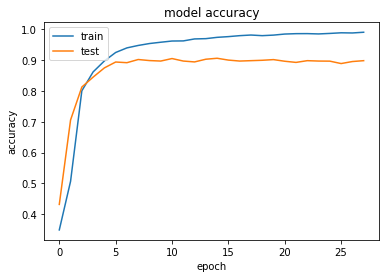

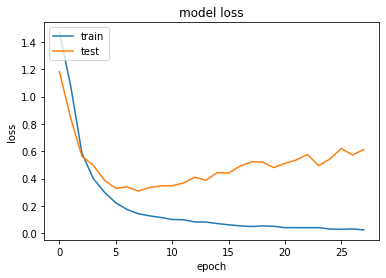

In [ ]:
# model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Dataset: https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=train.txt